# Temat testów:
### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od trudności? (grupy: wszystkie grafiki, grafiki A, grafiki B, grafiki 1,2,3)

In [87]:
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', 'Quest1_before', 'Quest2_before', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr']
)

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
    usecols=['ID', 'Quest1_after', 'Quest2_after']
)

df_merge = df_answers.merge(df_quest, on='ID')
df_merge.head()

,ID,Quest1_before,Quest2_before,1a_corr,1b_corr,2a_corr,2b_corr,3a_corr,3b_corr,Quest1_after,Quest2_after
0,1,B,wykres,1,1,0,0,1,1,B,wykres
1,2,B,wykres,1,1,1,1,0,1,B,wykres
2,3,B,mapa,1,1,1,1,0,0,B,mapa
3,4,B,mapa,1,1,1,1,1,0,B,wykres
4,5,B,tabela,1,1,1,1,1,1,B,tabela


Funkcje:

In [9]:
def prepate_set(list_of_cols_popr, quest1_before, quest1_after, quest2_before, quest2_after):
    new_row_popr = list_of_cols_popr[0]
    for i in list_of_cols_popr[1:]:
        new_row_popr = pd.concat([new_row_popr, i], ignore_index=True)

    new_row_quest1_b = quest1_before[0]
    for i in quest1_before[1:]:
        new_row_quest1_b = pd.concat([new_row_quest1_b, i], ignore_index=True)
        
    new_row_quest2_b = quest2_before[0]
    for i in quest2_before[1:]:
        new_row_quest2_b = pd.concat([new_row_quest2_b, i], ignore_index=True)
       
    new_row_quest1_a = quest1_after[0]
    for i in quest1_after[1:]:
        new_row_quest1_a = pd.concat([new_row_quest1_a, i], ignore_index=True)
        
    new_row_quest2_a = quest2_after[0]
    for i in quest2_after[1:]:
        new_row_quest2_a = pd.concat([new_row_quest2_a, i], ignore_index=True) 
        
    return pd.DataFrame({'poprawnosc': new_row_popr, 'quest1_before': new_row_quest1_b, 
                         'quest2_before': new_row_quest2_b, 'quest1_after': new_row_quest1_a,
                         'quest2_after': new_row_quest2_a})

In [16]:
def create_contingency_table(df, col):
    return pd.crosstab(df['poprawnosc'], df[col])

In [18]:
def make_decision(p_val, alpha):
    if p_val < alpha:
        print('Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1:')
    else:
        print('Brak podstaw do odrzucenia H0.')

In [19]:
def conduct_chi2test(contingency_table, alpha):
    chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

    print('Wartość statystyki chi-kwadrat:', chi2_stat)
    print('P-value:', p_val)
    make_decision(p_val, alpha)

In [135]:
def create_plots(df, columns):
    sns.countplot(x="poprawnosc", hue=columns[0], data=df)
    plt.xlabel('Poprawność')
    plt.ylabel('Liczba wystąpień')
    plt.title('Mapa vs mapa i inne formy prezentacji - przed badaniem')
    # plt.legend(labels=['mapa i inne elementy', 'mapa'])
    plt.show()
    
    sns.countplot(x="poprawnosc", hue=columns[1], data=df)
    plt.xlabel('Poprawność')
    plt.ylabel('Liczba wystąpień')
    plt.title('Mapa vs mapa i inne formy prezentacji - po badaniu')
    # plt.legend(labels=['mapa i inne elementy', 'mapa'])
    plt.show()
    
    sns.countplot(x="poprawnosc", hue=columns[2], data=df)
    plt.xlabel('Poprawność')
    plt.ylabel('Liczba wystąpień')
    plt.title('Mapa vs wykres vs tabela vs tekst - przed badaniem')
    plt.show()
    
    sns.countplot(x="poprawnosc", hue=columns[3], data=df)
    plt.xlabel('Poprawność')
    plt.ylabel('Liczba wystąpień')
    plt.title('Mapa vs wykres vs tabela vs tekst - po badaniu')
    plt.show()

### TESTY

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).
**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a wybraną preferowaną formą (mapa vs mapa + inne elementy; mapa vs tabela vs wykres vs tekst).
**Poziom istotności:** $\alpha=0.05$

Mamy dwie zmienne kategoryczne (dyskretne):
- poprawność $ \text{{0,1}} $
- preferowane formy

Stąd wykonujemy test chi-kwadrat.

In [136]:
ALPHA = 0.05

a) wszystkie grafiki

In [137]:
quest1_before = [df_merge['Quest1_before'] for i in range(5)]
quest2_before = [df_merge['Quest2_before'] for i in range(5)]
quest1_after = [df_merge['Quest1_after'] for i in range(5)]
quest2_after = [df_merge['Quest2_after'] for i in range(5)]

popr = []
for col in df_answers.columns.tolist():
    if col.endswith('corr'):
        popr.append(df_answers[col])
        
df = prepate_set(popr, quest1_before, quest1_after, quest2_before, quest2_after)

df

,poprawnosc,quest1_before,quest2_before,quest1_after,quest2_after
0,1,B,wykres,B,wykres
1,1,B,wykres,B,wykres
2,1,B,mapa,B,mapa
3,1,B,mapa,B,wykres
4,1,B,tabela,B,tabela
...,...,...,...,...,...
241,1,NaN,NaN,NaN,NaN
242,0,NaN,NaN,NaN,NaN
243,0,NaN,NaN,NaN,NaN
244,0,NaN,NaN,NaN,NaN


In [138]:
# Mapa vs Inne formy - before
contingency_table_q1_b = create_contingency_table(df, 'quest1_before')
contingency_table_q1_b

quest1_before,A,B
poprawnosc,,
0,3,47
1,17,138


In [139]:
conduct_chi2test(contingency_table_q1_b, ALPHA)

Wartość statystyki chi-kwadrat: 0.5705416303400173
P-value: 0.45004376716953165
Brak podstaw do odrzucenia H0.


In [140]:
# Mapa vs Inne formy - after
contingency_table_q1_a = create_contingency_table(df, 'quest1_after')
contingency_table_q1_a

quest1_after,A,B
poprawnosc,,
0,18,32
1,37,118


In [141]:
conduct_chi2test(contingency_table_q1_a, ALPHA)

Wartość statystyki chi-kwadrat: 2.2488880742913
P-value: 0.13371045039671625
Brak podstaw do odrzucenia H0.


In [142]:
# Mapa vs Wykres vs Tabela vs Tekst - before
contingency_table_q2_b = create_contingency_table(df, 'quest2_before')
contingency_table_q2_b

quest2_before,mapa,tabela,tekst,wykres
poprawnosc,,,,
0,27,10,1,12
1,78,25,14,38


In [143]:
conduct_chi2test(contingency_table_q1_b, ALPHA)

Wartość statystyki chi-kwadrat: 0.5705416303400173
P-value: 0.45004376716953165
Brak podstaw do odrzucenia H0.


In [144]:
# Mapa vs Wykres vs Tabela vs Tekst - after
contingency_table_q2_a = create_contingency_table(df, 'quest2_after')
contingency_table_q2_a

quest2_after,mapa,tabela,tekst,wykres
poprawnosc,,,,
0,27,5,2,16
1,68,25,3,59


In [145]:
conduct_chi2test(contingency_table_q1_b, ALPHA)

Wartość statystyki chi-kwadrat: 0.5705416303400173
P-value: 0.45004376716953165
Brak podstaw do odrzucenia H0.


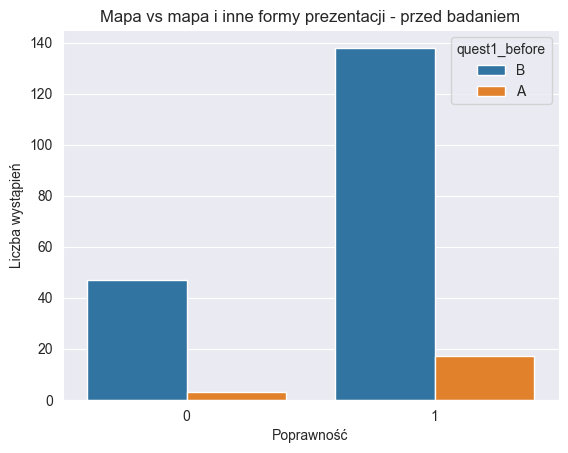

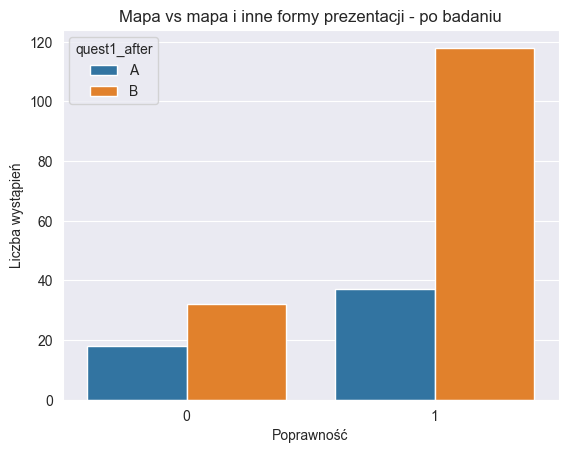

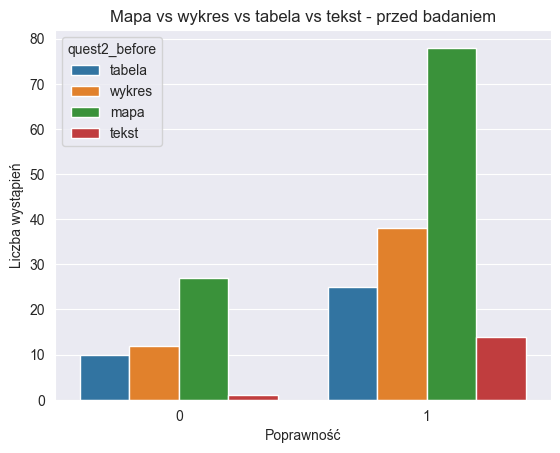

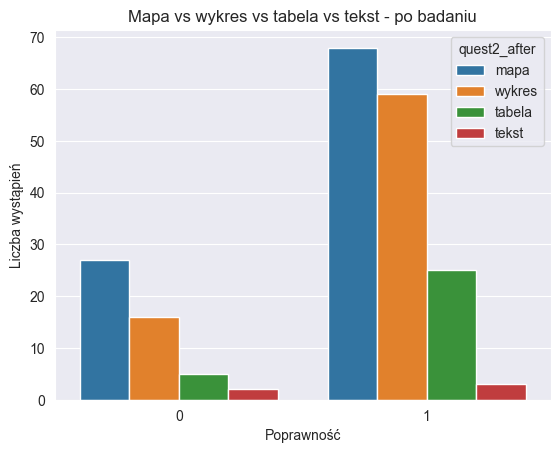

In [148]:
create_plots(df, ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after'])

b) grafiki A

In [33]:
quest1_before = [df_merge['Quest1_before'] for i in range(2)]
quest2_before = [df_merge['Quest2_before'] for i in range(2)]
quest1_after = [df_merge['Quest1_after'] for i in range(2)]
quest2_after = [df_merge['Quest2_after'] for i in range(2)]

popr = [df_answers['1a_corr'], df_answers['2a_corr'], df_answers['3a_corr']]
        
df = prepate_set(popr, quest1_before, quest1_after, quest2_before, quest2_after)
df

,poprawnosc,quest1_before,quest2_before,quest1_after,quest2_after
0,1,B,wykres,B,wykres
1,1,B,wykres,B,wykres
2,1,B,mapa,B,mapa
3,1,B,mapa,B,wykres
4,1,B,tabela,B,tabela
...,...,...,...,...,...
118,0,NaN,NaN,NaN,NaN
119,1,NaN,NaN,NaN,NaN
120,0,NaN,NaN,NaN,NaN
121,1,NaN,NaN,NaN,NaN


In [34]:
# Mapa vs Inne formy - before
contingency_table_q1_b = create_contingency_table(df, 'quest1_before')
contingency_table_q1_b

quest1_before,A,B
poprawnosc,,
0,1,16
1,7,58


In [35]:
conduct_chi2test(contingency_table_q1_b, ALPHA)

Wartość statystyki chi-kwadrat: 0.02118441971383143
P-value: 0.8842776798636873
Brak podstaw do odrzucenia H0.


In [36]:
# Mapa vs Inne formy - after
contingency_table_q1_a = create_contingency_table(df, 'quest1_after')
contingency_table_q1_a

quest1_after,A,B
poprawnosc,,
0,7,10
1,15,50


In [37]:
conduct_chi2test(contingency_table_q1_a, ALPHA)

Wartość statystyki chi-kwadrat: 1.421254627725216
P-value: 0.2331970078747408
Brak podstaw do odrzucenia H0.


In [38]:
# Mapa vs Wykres vs Tabela vs Tekst - before
contingency_table_q2_b = create_contingency_table(df, 'quest2_before')
contingency_table_q2_b

quest2_before,mapa,tabela,tekst,wykres
poprawnosc,,,,
0,9,3,1,4
1,33,11,5,16


In [39]:
conduct_chi2test(contingency_table_q1_b, ALPHA)

Wartość statystyki chi-kwadrat: 0.02118441971383143
P-value: 0.8842776798636873
Brak podstaw do odrzucenia H0.


In [40]:
# Mapa vs Wykres vs Tabela vs Tekst - after
contingency_table_q2_a = create_contingency_table(df, 'quest2_after')
contingency_table_q2_a

quest2_after,mapa,tabela,tekst,wykres
poprawnosc,,,,
0,10,2,1,4
1,28,10,1,26


In [41]:
conduct_chi2test(contingency_table_q2_a, ALPHA)

Wartość statystyki chi-kwadrat: 2.8834420893863624
P-value: 0.4099474143906233
Brak podstaw do odrzucenia H0.


c) grafiki B

In [42]:
quest1_before = [df_merge['Quest1_before'] for i in range(2)]
quest2_before = [df_merge['Quest2_before'] for i in range(2)]
quest1_after = [df_merge['Quest1_after'] for i in range(2)]
quest2_after = [df_merge['Quest2_after'] for i in range(2)]

popr = [df_answers['1b_corr'], df_answers['2b_corr'], df_answers['3b_corr']]
        
df = prepate_set(popr, quest1_before, quest1_after, quest2_before, quest2_after)
df

,poprawnosc,quest1_before,quest2_before,quest1_after,quest2_after
0,1,B,wykres,B,wykres
1,1,B,wykres,B,wykres
2,1,B,mapa,B,mapa
3,1,B,mapa,B,wykres
4,1,B,tabela,B,tabela
...,...,...,...,...,...
118,1,NaN,NaN,NaN,NaN
119,0,NaN,NaN,NaN,NaN
120,0,NaN,NaN,NaN,NaN
121,0,NaN,NaN,NaN,NaN


In [43]:
# Mapa vs Inne formy - before
contingency_table_q1_b = create_contingency_table(df, 'quest1_before')
contingency_table_q1_b

quest1_before,A,B
poprawnosc,,
0,1,13
1,7,61


In [18]:
conduct_chi2test(contingency_table, H0, H1, ALPHA)

Wartość statystyki chi-kwadrat: 6.181604634190842
P-value: 0.1859902175015663
Brak podstaw do odrzucenia H0.
Nie ma istotnej statystycznie zależności między poziomem trudności a poprawnością odpowiedzi.


In [44]:
conduct_chi2test(contingency_table_q1_b, ALPHA)

Wartość statystyki chi-kwadrat: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.


In [45]:
# Mapa vs Inne formy - after
contingency_table_q1_a = create_contingency_table(df, 'quest1_after')
contingency_table_q1_a

quest1_after,A,B
poprawnosc,,
0,6,8
1,16,52


In [46]:
conduct_chi2test(contingency_table_q1_a, ALPHA)

Wartość statystyki chi-kwadrat: 1.3343662464985995
P-value: 0.24802994091918268
Brak podstaw do odrzucenia H0.


In [47]:
# Mapa vs Wykres vs Tabela vs Tekst - before
contingency_table_q2_b = create_contingency_table(df, 'quest2_before')
contingency_table_q2_b

quest2_before,mapa,tabela,tekst,wykres
poprawnosc,,,,
0,7,4,0,3
1,35,10,6,17


In [48]:
conduct_chi2test(contingency_table_q1_b, ALPHA)

Wartość statystyki chi-kwadrat: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.


In [49]:
# Mapa vs Wykres vs Tabela vs Tekst - after
contingency_table_q2_a = create_contingency_table(df, 'quest2_after')
contingency_table_q2_a

quest2_after,mapa,tabela,tekst,wykres
poprawnosc,,,,
0,6,2,0,6
1,32,10,2,24


In [50]:
conduct_chi2test(contingency_table_q1_b, ALPHA)

Wartość statystyki chi-kwadrat: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.


d) grafiki 1,2,3

-> 1

In [73]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('1') and col.endswith('_corr'):
        popr.append(df_merge[col])
        
quest1_before = [df_merge['Quest1_before'] for i in range(1)]
quest2_before = [df_merge['Quest2_before'] for i in range(1)]
quest1_after = [df_merge['Quest1_after'] for i in range(1)]
quest2_after = [df_merge['Quest2_after'] for i in range(1)]
        
df = prepate_set(popr, quest1_before, quest1_after, quest2_before, quest2_after)
df

,poprawnosc,quest1_before,quest2_before,quest1_after,quest2_after
0,1,B,wykres,B,wykres
1,1,B,wykres,B,wykres
2,1,B,mapa,B,mapa
3,1,B,mapa,B,wykres
4,1,B,tabela,B,tabela
...,...,...,...,...,...
77,1,NaN,NaN,NaN,NaN
78,1,NaN,NaN,NaN,NaN
79,1,NaN,NaN,NaN,NaN
80,1,NaN,NaN,NaN,NaN


In [74]:
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    tab = create_contingency_table(df, i)
    conduct_chi2test(tab, ALPHA)

----------------
quest1_before
Wartość statystyki chi-kwadrat: 0.00038475975975976035
P-value: 0.9843502633116243
Brak podstaw do odrzucenia H0.
----------------
quest1_after
Wartość statystyki chi-kwadrat: 5.406098484848484
P-value: 0.020066516230538914
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1:
----------------
quest2_before
Wartość statystyki chi-kwadrat: 0.5759523809523808
P-value: 0.9019147738707174
Brak podstaw do odrzucenia H0.
----------------
quest2_after
Wartość statystyki chi-kwadrat: 6.593567251461989
P-value: 0.08604458771266413
Brak podstaw do odrzucenia H0.


-> 2

In [75]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('2') and col.endswith('_corr'):
        popr.append(df_merge[col])
        
quest1_before = [df_merge['Quest1_before'] for i in range(1)]
quest2_before = [df_merge['Quest2_before'] for i in range(1)]
quest1_after = [df_merge['Quest1_after'] for i in range(1)]
quest2_after = [df_merge['Quest2_after'] for i in range(1)]
        
df = prepate_set(popr, quest1_before, quest1_after, quest2_before, quest2_after)
df

,poprawnosc,quest1_before,quest2_before,quest1_after,quest2_after
0,0,B,wykres,B,wykres
1,1,B,wykres,B,wykres
2,1,B,mapa,B,mapa
3,1,B,mapa,B,wykres
4,1,B,tabela,B,tabela
...,...,...,...,...,...
77,1,NaN,NaN,NaN,NaN
78,1,NaN,NaN,NaN,NaN
79,1,NaN,NaN,NaN,NaN
80,0,NaN,NaN,NaN,NaN


In [76]:
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    tab = create_contingency_table(df, i)
    conduct_chi2test(tab, ALPHA)

----------------
quest1_before
Wartość statystyki chi-kwadrat: 0.6020163482447966
P-value: 0.43780973041461047
Brak podstaw do odrzucenia H0.
----------------
quest1_after
Wartość statystyki chi-kwadrat: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.
----------------
quest2_before
Wartość statystyki chi-kwadrat: 0.03310071154898744
P-value: 0.9984141348881518
Brak podstaw do odrzucenia H0.
----------------
quest2_after
Wartość statystyki chi-kwadrat: 2.593607582173825
P-value: 0.4586113225691323
Brak podstaw do odrzucenia H0.


-> 3

In [79]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('3') and col.endswith('_corr'):
        popr.append(df_merge[col])
        
quest1_before = [df_merge['Quest1_before'] for i in range(1)]
quest2_before = [df_merge['Quest2_before'] for i in range(1)]
quest1_after = [df_merge['Quest1_after'] for i in range(1)]
quest2_after = [df_merge['Quest2_after'] for i in range(1)]
        
df = prepate_set(popr, quest1_before, quest1_after, quest2_before, quest2_after)
df

,poprawnosc,quest1_before,quest2_before,quest1_after,quest2_after
0,1,B,wykres,B,wykres
1,0,B,wykres,B,wykres
2,0,B,mapa,B,mapa
3,1,B,mapa,B,wykres
4,1,B,tabela,B,tabela
...,...,...,...,...,...
77,1,NaN,NaN,NaN,NaN
78,0,NaN,NaN,NaN,NaN
79,0,NaN,NaN,NaN,NaN
80,0,NaN,NaN,NaN,NaN


In [80]:
for i in ['quest1_before', 'quest1_after', 'quest2_before', 'quest2_after']:
    print('----------------')
    print(i)
    tab = create_contingency_table(df, i)
    conduct_chi2test(tab, ALPHA)

----------------
quest1_before
Wartość statystyki chi-kwadrat: 0.13934194361825952
P-value: 0.7089360876422948
Brak podstaw do odrzucenia H0.
----------------
quest1_after
Wartość statystyki chi-kwadrat: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.
----------------
quest2_before
Wartość statystyki chi-kwadrat: 2.98695602642971
P-value: 0.39364067575112605
Brak podstaw do odrzucenia H0.
----------------
quest2_after
Wartość statystyki chi-kwadrat: 4.545173340048686
P-value: 0.20829614814340108
Brak podstaw do odrzucenia H0.


e) zadania 1a, 1b, 2a, 2b, 3a, 3b

In [64]:
df1a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '1a_corr']].rename(columns={'1a_corr':'poprawnosc'})
df2a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '2a_corr']].rename(columns={'2a_corr':'poprawnosc'})
df3a = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '3a_corr']].rename(columns={'3a_corr':'poprawnosc'})

df1b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '1b_corr']].rename(columns={'1b_corr':'poprawnosc'})
df2b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '2b_corr']].rename(columns={'2b_corr':'poprawnosc'})
df3b = df_merge[['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after', '3b_corr']].rename(columns={'3b_corr':'poprawnosc'})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]

In [68]:
for nr, dfx in enumerate(dfs):
    print('---------------------------------------------')
    print(nr+1)
    for i in ['Quest1_before', 'Quest1_after', 'Quest2_before', 'Quest2_after']:
        print('----------------')
        print(i)
        tab = create_contingency_table(dfx, i)
        conduct_chi2test(tab, ALPHA)

---------------------------------------------
1
----------------
Quest1_before
Wartość statystyki chi-kwadrat: 0.00038475975975976035
P-value: 0.9843502633116243
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
Wartość statystyki chi-kwadrat: 5.406098484848484
P-value: 0.020066516230538914
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1:
----------------
Quest2_before
Wartość statystyki chi-kwadrat: 0.5759523809523808
P-value: 0.9019147738707174
Brak podstaw do odrzucenia H0.
----------------
Quest2_after
Wartość statystyki chi-kwadrat: 6.593567251461989
P-value: 0.08604458771266413
Brak podstaw do odrzucenia H0.
---------------------------------------------
2
----------------
Quest1_before
Wartość statystyki chi-kwadrat: 0.0
P-value: 1.0
Brak podstaw do odrzucenia H0.
----------------
Quest1_after
Wartość statystyki chi-kwadrat: 0.8852272727272728
P-value: 0.34677395734420646
Brak podstaw do odrzucenia H0.
----------------
Quest2_before
Wartość statystyki chi-k

### Podsumowanie:
Istnieje istotna statystycznie zależność między poziomem trudności a poprawnością odpowiedzi na poziomie istotności $\alpha=0.05$ dla:
- grafiki 1, quest1_after
- grafika 1a, quest1_after
- grafika 3b, quest2_after

